In [95]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError, Huber
import keras_tuner as kt
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [96]:
df = pd.read_csv("C:/Users/anand/Documents/Capstone Files Dump/Test case 1/processed_cryptodata.csv")

In [97]:
# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

C:\Users\anand\AppData\Local\Temp\ipykernel_33428\1383876153.py:2: UserWarning:

Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



In [98]:
df.shape

(7200, 25)

In [99]:
crypto ="Litecoin"

In [100]:
# Selecting relevant columns for LSTM
features = ['Open', 'High', 'Low', 'Volume', 'VWAP', 'Volatility', 'Price_Change', 'RSI', 'MACD',
            'MA_7', 'MA_14', 'EMA_7', 'EMA_14', 'Rolling_Std_7', 'Rolling_Std_14',
            'Day_of_Week', 'Month', 'Week_of_Year', 'Close_Lag_1', 'Close_Lag_2', 'Close_Lag_3']
target = 'Close'

In [101]:
crypto_df = df[df['Crypto'] == crypto].drop(columns=['Crypto']).dropna()

In [102]:
crypto_df.shape

(707, 24)

In [103]:
crypto_df.isnull().sum()

Timestamp         0
Open              0
High              0
Low               0
Close             0
VWAP              0
Volume            0
Count             0
Volatility        0
Price_Change      0
RSI               0
MA_7              0
MA_14             0
Close_Lag_1       0
Close_Lag_2       0
Close_Lag_3       0
Rolling_Std_7     0
Rolling_Std_14    0
EMA_7             0
EMA_14            0
MACD              0
Day_of_Week       0
Month             0
Week_of_Year      0
dtype: int64

In [104]:
crypto_df.head()

,Timestamp,Open,High,Low,Close,VWAP,Volume,Count,Volatility,Price_Change,...,Close_Lag_2,Close_Lag_3,Rolling_Std_7,Rolling_Std_14,EMA_7,EMA_14,MACD,Day_of_Week,Month,Week_of_Year
3613,2023-03-08,86.33,86.66,81.39,82.69,83.68,26331.61361,3758,5.27,-3.64,...,87.37,89.91,3.938735,4.135943,87.988647,90.327358,-2.338712,2,3,10
3614,2023-03-09,82.78,84.90,74.96,76.68,78.59,38109.61823,4786,9.94,-6.01,...,86.33,87.37,4.954428,5.627169,85.161485,88.507711,-3.346226,3,3,10
3615,2023-03-10,76.66,76.78,67.96,71.72,71.51,44462.65463,6804,8.82,-4.96,...,82.69,86.33,6.886702,7.475222,81.801114,86.269349,-4.468235,4,3,10
3616,2023-03-11,71.71,74.56,65.28,69.78,69.58,79387.12122,9565,9.28,-1.94,...,76.68,82.69,7.968605,8.911380,78.795835,84.070769,-5.274934,5,3,10
3617,2023-03-12,69.71,76.85,67.84,76.78,71.15,63004.07456,7251,9.01,7.00,...,71.72,76.68,6.896020,8.992480,78.291876,83.098667,-4.806790,6,3,10


In [105]:
cleaned_csv_path = "C:/Users/anand/Documents/Capstone Files Dump//Test case 1/cleaned_litecoin_data.csv"
crypto_df.to_csv(cleaned_csv_path, index=False)

# Confirm file saved
print(f"Cleaned dataset saved at: {cleaned_csv_path}")

Cleaned dataset saved at: C:/Users/anand/Documents/Capstone Files Dump//Test case 1/cleaned_litecoin_data.csv


In [106]:
df = pd.read_csv("C:/Users/anand/Documents/Capstone Files Dump/Test case 1/cleaned_litecoin_data.csv")

In [107]:
df = df.sort_values(by=['Timestamp'])

In [ ]:
import plotly.express as px

fig = px.line(df, x=df['Timestamp'], y=df['Close'], labels={'Timestamp': 'Date', 'Close': 'Close Price'})


# Update trace settings
fig.update_traces(
    marker_line_width=2, 
    opacity=0.8, 
    marker_line_color='orange'
)

# Update layout with title and styling
fig.update_layout(
    title_text='Whole period of timeframe of Litecoin close price ',
    plot_bgcolor='white',
    font_size=15,
    font_color='black'
)

# Remove grid from x and y axes
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

# Show plot
fig.show()

: 

Trial 15 Complete [00h 01m 12s]
val_loss: 0.010002118535339832

Best val_loss So Far: 0.0037302710115909576
Total elapsed time: 00h 09m 11s
Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 14s 236ms/step - loss: 0.4172 - val_loss: 0.0118
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 163ms/step - loss: 0.0119 - val_loss: 0.0123
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 149ms/step - loss: 0.0042 - val_loss: 0.0151
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 155ms/step - loss: 0.0025 - val_loss: 0.0132
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 168ms/step - loss: 0.0025 - val_loss: 0.0122
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 173ms/step - loss: 0.0018 - val_loss: 0.0089
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 159ms/step - loss: 0.0014 - val_loss: 0.0073
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 178ms/step - loss: 0.0013 - val_loss: 0.0091
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 153ms/step - loss: 0.0012 - val_loss: 0.0065
Epoch 10/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 137ms/step - loss: 0.0011 - val_loss: 0.005

Model saved: models/LSTM_Litecoin.h5
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 391ms/step


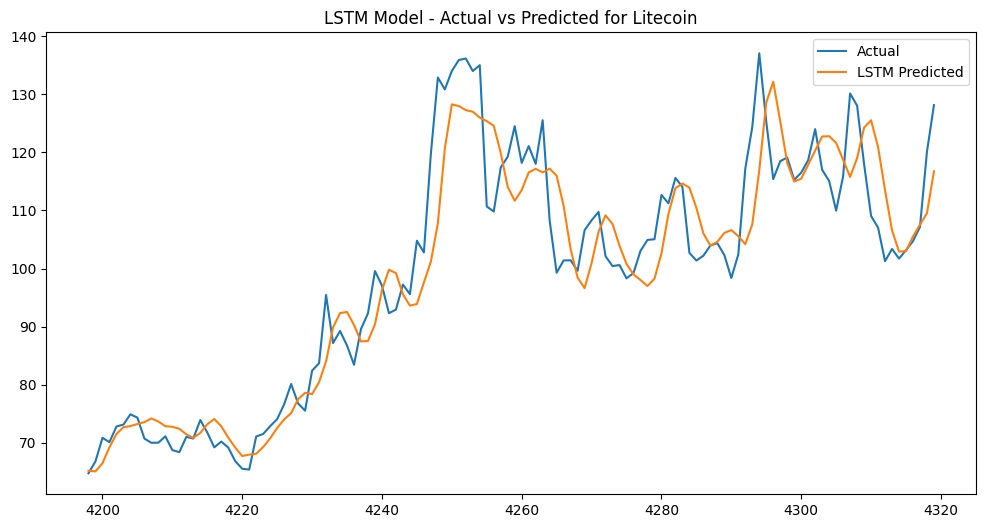

Performance for Litecoin: {'MAE': np.float64(5.628941535324348), 'MSE': np.float64(56.68567275318519), 'RMSE': np.float64(7.528988826740626), 'R-squared': 0.8646143963735179}


In [82]:
# Normalize data using MinMaxScaler
scaler_features = MinMaxScaler()
scaler_target = MinMaxScaler()
crypto_scaled_features = scaler_features.fit_transform(crypto_df[features])  
target_scaled = scaler_target.fit_transform(crypto_df[[target]])  

# Combine after scaling
crypto_scaled = np.hstack((crypto_scaled_features, target_scaled))
crypto_scaled = pd.DataFrame(crypto_scaled, columns=features + [target], index=crypto_df.index)

# Train-Test Split
train_size = int(len(crypto_scaled) * 0.8)
train, test = crypto_scaled.iloc[:train_size], crypto_scaled.iloc[train_size:]

# Dynamic Sequence Length Tuning
def create_sequences(data, seq_length):
    x_data, y_data = [], []
    for i in range(seq_length, len(data)):
        x_data.append(data.iloc[i-seq_length:i][features].values)
        y_data.append(data.iloc[i][target])
    return np.array(x_data), np.array(y_data)

# Define Model for Keras Tuner
def build_model(hp):
    sequence_length = hp.Int('sequence_length', min_value=5, max_value=30, step=5)

    model = Sequential([
        Input(shape=(sequence_length, len(features))),
        Bidirectional(LSTM(hp.Int('units_1', min_value=64, max_value=512, step=64), return_sequences=True)),
        Dropout(hp.Float('dropout_1', 0.005, 0.02, step=0.005)),

        LSTM(hp.Int('units_2', min_value=64, max_value=512, step=64), return_sequences=True),
        Dropout(hp.Float('dropout_2', 0.005, 0.02, step=0.005)),

        LSTM(hp.Int('units_3', min_value=64, max_value=512, step=64), return_sequences=False),
        Dropout(hp.Float('dropout_3', 0.005, 0.02, step=0.005)),

        Dense(hp.Int('dense_units', 32, 128, step=32), activation='tanh'),
        Dense(1, activation='linear')
    ])

    # Choose loss function dynamically
    loss_fn = hp.Choice('loss_function', ['mse', 'huber'])

    model.compile(optimizer=Adam(learning_rate=hp.Choice('learning_rate', [0.0005, 0.001, 0.002, 0.003])),
                  loss=MeanSquaredError() if loss_fn == 'mse' else Huber(delta=2))  # Huber Loss adjusted for Litecoin
    return model

# Setup Keras Tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=15,  # Increase trials for better optimization
    executions_per_trial=1,
    directory='lstm_tuning',
    project_name=f'crypto_forecasting_{crypto}',
    overwrite=True
)

# Run Hyperparameter Tuning
x_train, y_train = create_sequences(train, 10)  # Temporary value, will be optimized
x_test, y_test = create_sequences(test, 10)

tuner.search(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=32, verbose=1)

# Get Best Hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
optimal_sequence_length = best_hps.get('sequence_length')

# Train Final Model with Best Sequence Length
x_train, y_train = create_sequences(train, optimal_sequence_length)
x_test, y_test = create_sequences(test, optimal_sequence_length)

model = build_model(best_hps)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=32, verbose=1, callbacks=[early_stopping])

# Save Model
model.save(os.path.join("models", f"LSTM_{crypto}.h5"))
print(f"Model saved: models/LSTM_{crypto}.h5")

# Make Predictions
y_pred = model.predict(x_test)
y_pred_rescaled = scaler_target.inverse_transform(y_pred.reshape(-1, 1))[:, 0]
y_test_rescaled = scaler_target.inverse_transform(y_test.reshape(-1, 1))[:, 0]

# Plot Predictions
plt.figure(figsize=(12, 6))
plt.plot(test.index[optimal_sequence_length:], y_test_rescaled, label="Actual")
plt.plot(test.index[optimal_sequence_length:], y_pred_rescaled, label="LSTM Predicted")
plt.title(f"LSTM Model - Actual vs Predicted for {crypto}")
plt.legend()
plt.show()

# Compute Performance Metrics
performance_metrics = {
    "MAE": mean_absolute_error(y_test_rescaled, y_pred_rescaled),
    "MSE": mean_squared_error(y_test_rescaled, y_pred_rescaled),
    "RMSE": np.sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled)),
    "R-squared": r2_score(y_test_rescaled, y_pred_rescaled)
}

# Print & Save Metrics
print(f"Performance for {crypto}: {performance_metrics}")
pd.DataFrame([performance_metrics]).to_csv(f"LSTM_Performance_{crypto}.csv", index=False)

In [9]:
import pandas as pd

data_path = "C:/Users/anand/Documents/Capstone Files Dump/Test case 1/separatemodeltraining/cleaned_litecoin_data.csv"
lit_df = pd.read_csv(data_path)

# Convert Timestamp to datetime
lit_df['Timestamp'] = pd.to_datetime(lit_df['Timestamp'])
lit_df.set_index('Timestamp', inplace=True)

# Define target variable (Close price)
close_prices = lit_df['Close']

# Define exogenous features
features = ['MACD', 'EMA_7', 'Close_Lag_1']
exog_features = lit_df[features]

# Display first few rows
print(lit_df.head())

             Open   High    Low  Close   VWAP       Volume  Count  Volatility  \
Timestamp                                                                       
2023-03-08  86.33  86.66  81.39  82.69  83.68  26331.61361   3758        5.27   
2023-03-09  82.78  84.90  74.96  76.68  78.59  38109.61823   4786        9.94   
2023-03-10  76.66  76.78  67.96  71.72  71.51  44462.65463   6804        8.82   
2023-03-11  71.71  74.56  65.28  69.78  69.58  79387.12122   9565        9.28   
2023-03-12  69.71  76.85  67.84  76.78  71.15  63004.07456   7251        9.01   

            Price_Change        RSI  ...  Close_Lag_2  Close_Lag_3  \
Timestamp                            ...                             
2023-03-08         -3.64  29.121456  ...        87.37        89.91   
2023-03-09         -6.01  24.060150  ...        86.33        87.37   
2023-03-10         -4.96  22.794521  ...        82.69        86.33   
2023-03-11         -1.94  18.129927  ...        76.68        82.69   
2023-03-12  

In [10]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF Test on Close Price
adf_test = adfuller(close_prices)

print(f"ADF Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")

if adf_test[1] < 0.05:
    print("✅ Data is stationary, ARIMA can be applied directly (d=0).")
else:
    print("⚠️ Data is non-stationary, differencing is required (d>0).")

ADF Statistic: -1.5186710625912927
p-value: 0.5242556449665295
⚠️ Data is non-stationary, differencing is required (d>0).


In [11]:
# Apply first-order differencing if needed
diff_close_prices = close_prices.diff().dropna()

# Perform ADF test again
adf_test_diff = adfuller(diff_close_prices)

print(f"After Differencing - ADF Statistic: {adf_test_diff[0]}")
print(f"After Differencing - p-value: {adf_test_diff[1]}")

if adf_test_diff[1] < 0.05:
    print("✅ Data is now stationary, ARIMA can be applied with d=1.")
else:
    print("⚠️ Still non-stationary, consider d=2.")

After Differencing - ADF Statistic: -9.861824667412831
After Differencing - p-value: 4.2133166331727657e-17
✅ Data is now stationary, ARIMA can be applied with d=1.


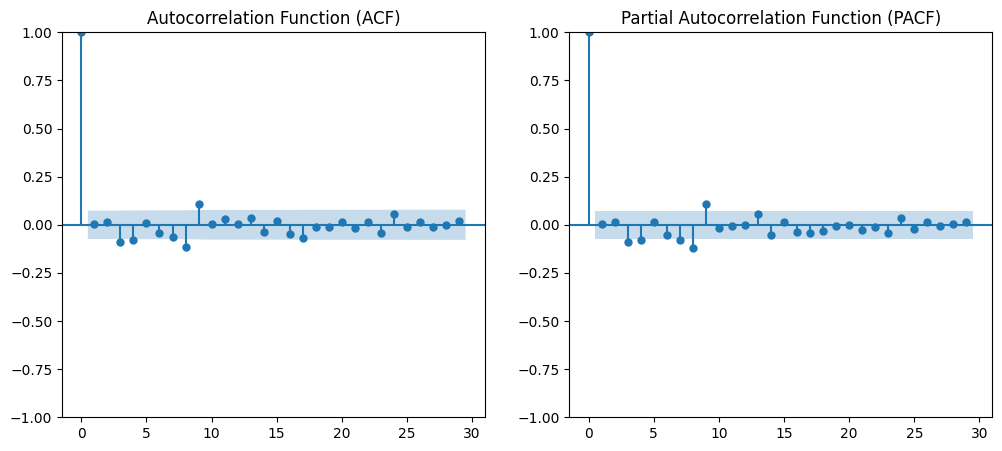

In [12]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF & PACF
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# ACF Plot (for q)
plot_acf(diff_close_prices, ax=axes[0])
axes[0].set_title("Autocorrelation Function (ACF)")

# PACF Plot (for p)
plot_pacf(diff_close_prices, ax=axes[1])
axes[1].set_title("Partial Autocorrelation Function (PACF)")

plt.show()

In [9]:
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error

# Define possible values for p, d, q, P, D, Q
p = range(0, 3)
d = range(0, 2)
q = range(0, 3)
P = range(0, 2)
D = range(0, 2)
Q = range(0, 2)
s = [7]  # Weekly seasonality

best_mae = float("inf")
best_params = None
best_model = None

# Grid search over all combinations
for param in itertools.product(p, d, q, P, D, Q, s):
    try:
        model = SARIMAX(close_prices, exog=exog_features, order=param[:3], seasonal_order=param[3:])
        result = model.fit(disp=False)
        
        # Forecast for last 30 days
        forecast = result.forecast(steps=30, exog=exog_features.iloc[-30:])
        
        # Compute MAE
        mae = mean_absolute_error(close_prices[-30:], forecast)
        
        if mae < best_mae:
            best_mae = mae
            best_params = param
            best_model = result
    
    except:
        continue

print(f"✅ Best SARIMAX Parameters: {best_params} with MAE: {best_mae}")

c:\Users\anand\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\anand\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\anand\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\anand\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\anand\AppData\Local\Programs\Python\Python312\Lib\s

✅ Best SARIMAX Parameters: (0, 0, 0, 0, 1, 1, 7) with MAE: 4.941621718716875


c:\Users\anand\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [13]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Train the final optimized SARIMAX model
sarimax_final = SARIMAX(close_prices, exog=exog_features,
                        order=(0, 0, 0), seasonal_order=(0, 1, 1, 7))
sarimax_result_final = sarimax_final.fit()

# Print summary of the final model
print(sarimax_result_final.summary())

c:\Users\anand\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\anand\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                 SARIMAX Results                                 
Dep. Variable:                     Close   No. Observations:                  707
Model:             SARIMAX(0, 1, [1], 7)   Log Likelihood               -1778.428
Date:                   Thu, 03 Apr 2025   AIC                           3566.856
Time:                           11:38:28   BIC                           3589.611
Sample:                       03-08-2023   HQIC                          3575.652
                            - 02-11-2025                                         
Covariance Type:                     opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
MACD            0.9848      0.048     20.710      0.000       0.892       1.078
EMA_7           0.8197      0.029     28.422      0.000       0.763       0.876
Close_Lag_1     0.1491  

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Forecast next 30 days
sarimax_forecast = sarimax_result_final.forecast(steps=30, exog=exog_features.iloc[-30:])

# Compute Performance Metrics
mae_sarimax = mean_absolute_error(close_prices[-30:], sarimax_forecast)
mse_sarimax = mean_squared_error(close_prices[-30:], sarimax_forecast)
rmse_sarimax = np.sqrt(mse_sarimax)
r2_sarimax = r2_score(close_prices[-30:], sarimax_forecast)

sarimax_performance = {
    "MAE": mae_sarimax,
    "MSE": mse_sarimax,
    "RMSE": rmse_sarimax,
    "R-squared": r2_sarimax
}

print("📊 Final SARIMAX Performance Metrics:", sarimax_performance)


📊 Final SARIMAX Performance Metrics: {'MAE': np.float64(4.941621718716875), 'MSE': np.float64(40.632186488046685), 'RMSE': np.float64(6.374338121565774), 'R-squared': 0.5631106060557725}


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step


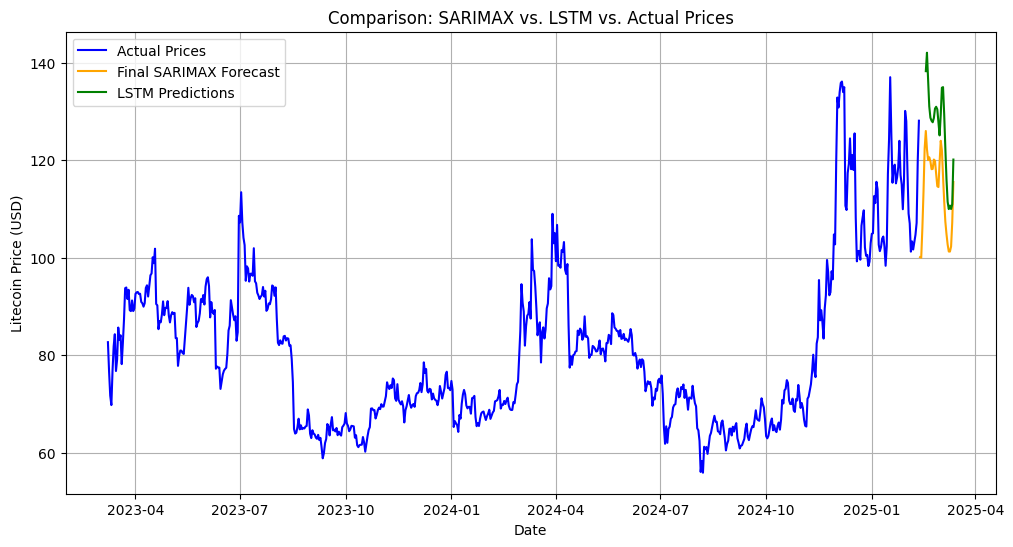

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler

# Load trained LSTM model
lstm_model_path = "C:/Users/anand/Documents/Capstone Files Dump/Test case 1/models/LSTM_Litecoin.h5"
lstm_model = load_model(lstm_model_path)

# Normalize data before feeding into LSTM
features = ['Open', 'High', 'Low', 'Volume', 'VWAP', 'Volatility', 'Price_Change', 'RSI', 'MACD',
            'MA_7', 'MA_14', 'EMA_7', 'EMA_14', 'Rolling_Std_7', 'Rolling_Std_14',
            'Day_of_Week', 'Month', 'Week_of_Year', 'Close_Lag_1', 'Close_Lag_2', 'Close_Lag_3']
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(lit_df[features])

# Prepare test data for LSTM
look_back = 5
test_scaled = scaled_data[-30:]  # Last 30 days for testing
X_test = []
for i in range(look_back, len(test_scaled)):
    X_test.append(test_scaled[i - look_back:i, :])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], look_back, len(features)))

# LSTM Predictions
lstm_predictions = lstm_model.predict(X_test)

# Inverse transform predictions
lstm_predictions = scaler.inverse_transform(
    np.concatenate([np.zeros((lstm_predictions.shape[0], len(features)-1)), lstm_predictions], axis=1)
)[:, -1]  # Extract only Close Price

# Generate future dates for plotting (30 days ahead)
final_future_dates = pd.date_range(start=close_prices.index[-1], periods=30 + 1, freq='D')[1:]

# Adjust test index for LSTM predictions (aligned with available test data)
lstm_test_index = final_future_dates[look_back:]

# Plot SARIMAX vs. LSTM vs. Actual Prices
plt.figure(figsize=(12, 6))
plt.plot(close_prices.index, close_prices, label="Actual Prices", color='blue')
plt.plot(final_future_dates, sarimax_forecast, label="Final SARIMAX Forecast", color='orange')
plt.plot(lstm_test_index, lstm_predictions, label="LSTM Predictions", color='green')

plt.xlabel('Date')
plt.ylabel('Litecoin Price (USD)')
plt.title("Comparison: SARIMAX vs. LSTM vs. Actual Prices")
plt.legend()
plt.grid()
plt.show()


In [16]:
# Save the trained SARIMAX model
sarimax_model_path = "C:/Users/anand/Documents/Capstone Files Dump/Test case 1/SARIMAX_model/SARIMAX_Litecoin.pkl"
sarimax_result_final.save(sarimax_model_path)

c:\Users\anand\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\anand\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


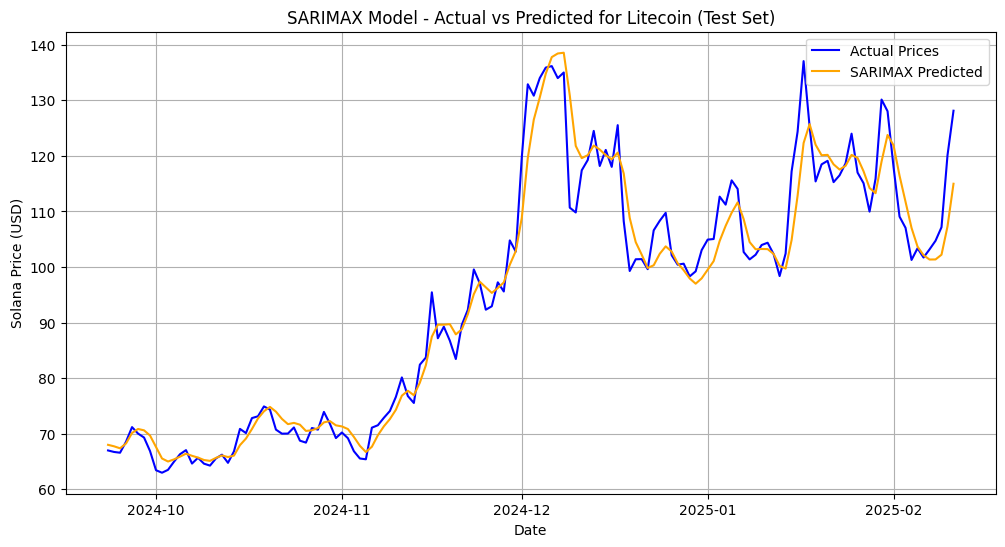

{'MAE': np.float64(3.1532466755093997),
 'MSE': np.float64(21.833593049732475),
 'RMSE': np.float64(4.672643047540918),
 'R² Score': 0.9558507955363796}

In [17]:
# Split data into 80% train and 20% test sets
train_size = int(len(close_prices) * 0.8)
train_y, test_y = close_prices[:train_size], close_prices[train_size:]
train_exog, test_exog = exog_features[:train_size], exog_features[train_size:]

# Train SARIMAX using best-found parameters
sarimax_model = SARIMAX(train_y, exog=train_exog, order=(0, 0, 0), seasonal_order=(0, 1, 1, 7))
sarimax_result = sarimax_model.fit(disp=False)

# Predict for the test set
sarimax_pred = sarimax_result.predict(start=len(train_y), end=len(close_prices)-1, exog=test_exog)

# Compute Performance Metrics for SARIMAX
mae_sarimax = mean_absolute_error(test_y, sarimax_pred)
mse_sarimax = mean_squared_error(test_y, sarimax_pred)
rmse_sarimax = np.sqrt(mse_sarimax)
r2_sarimax = r2_score(test_y, sarimax_pred)

sarimax_performance = {
    "MAE": mae_sarimax,
    "MSE": mse_sarimax,
    "RMSE": rmse_sarimax,
    "R² Score": r2_sarimax
}

# Plot SARIMAX predictions vs Actual values
plt.figure(figsize=(12, 6))
plt.plot(test_y.index, test_y, label="Actual Prices", color='blue')
plt.plot(test_y.index, sarimax_pred, label="SARIMAX Predicted", color='orange')

plt.xlabel('Date')
plt.ylabel('Solana Price (USD)')
plt.title("SARIMAX Model - Actual vs Predicted for Litecoin (Test Set)")
plt.legend()
plt.grid()
plt.show()

# Display SARIMAX performance
sarimax_performance

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step


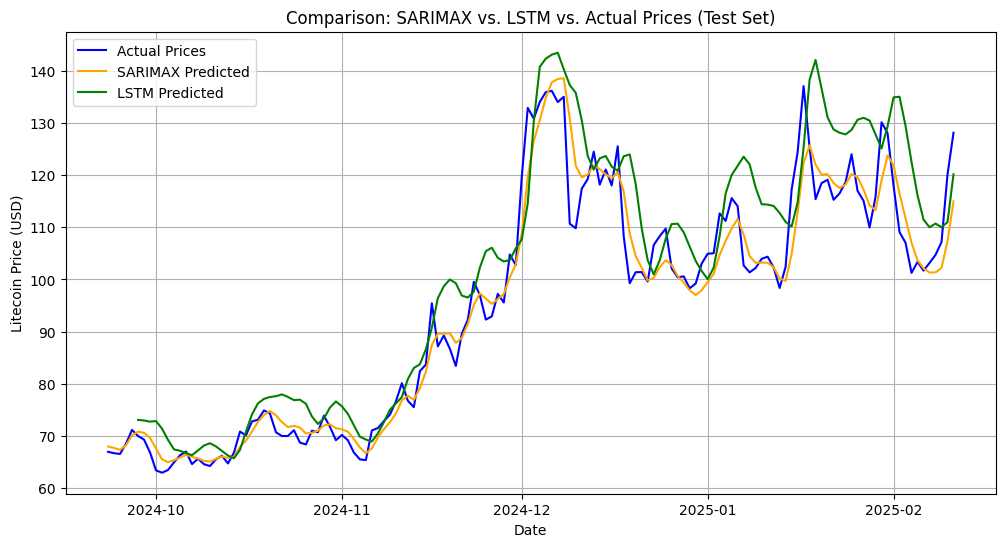

In [18]:
# Load the trained LSTM model
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler

# Define path to LSTM model
lstm_model_path = "C:/Users/anand/Documents/Capstone Files Dump/Test case 1/models/LSTM_Litecoin.h5"

# Load the model
lstm_model = load_model(lstm_model_path)

# Normalize data before feeding into LSTM
features = ['Open', 'High', 'Low', 'Volume', 'VWAP', 'Volatility', 'Price_Change', 'RSI', 'MACD',
            'MA_7', 'MA_14', 'EMA_7', 'EMA_14', 'Rolling_Std_7', 'Rolling_Std_14',
            'Day_of_Week', 'Month', 'Week_of_Year', 'Close_Lag_1', 'Close_Lag_2', 'Close_Lag_3']

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(lit_df[features])

# Prepare test data for LSTM
look_back = 5
test_scaled = scaled_data[-len(test_y):]  # Use test data for LSTM
X_test = []
for i in range(look_back, len(test_scaled)):
    X_test.append(test_scaled[i - look_back:i, :])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], look_back, len(features)))

# Generate LSTM Predictions
lstm_predictions = lstm_model.predict(X_test)

# Inverse transform predictions
lstm_predictions = scaler.inverse_transform(
    np.concatenate([np.zeros((lstm_predictions.shape[0], len(features) - 1)), lstm_predictions], axis=1)
)[:, -1]  # Extract only Close Price

# Adjust test index for LSTM predictions (aligned with available test data)
lstm_test_index = test_y.index[look_back:]

# Plot SARIMAX vs. LSTM vs. Actual Prices
plt.figure(figsize=(12, 6))
plt.plot(test_y.index, test_y, label="Actual Prices", color='blue')
plt.plot(test_y.index, sarimax_pred, label="SARIMAX Predicted", color='orange')
plt.plot(lstm_test_index, lstm_predictions, label="LSTM Predicted", color='green')

plt.xlabel('Date')
plt.ylabel('Litecoin Price (USD)')
plt.title("Comparison: SARIMAX vs. LSTM vs. Actual Prices (Test Set)")
plt.legend()
plt.grid()
plt.show()